In [6]:
#adicionar 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score



In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
import requests
import io

In [9]:
import os

cwd = os.getcwd() 
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Catarina Rodrigues\\Desktop\\EDSB': ['.git', '.ipynb_checkpoints', '.vscode', 'age_2.png', 'Age_Plot.png', 'corr.png', 'Department.png', 'DistanceFromHome_Plot.png', 'educationfield.png', 'HR_clean.csv', 'HR_DS.csv', 'MonthlyIncome_Attrition.png', 'output.png', 'Projecto.ipynb']


In [10]:
url = 'https://raw.githubusercontent.com/catarinatomasr/projectoEDSB/main/HR_DS.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
data = df
#df = pd.read_csv('https://github.com/catarinatomasr/projectoEDSB/blob/main/HR_DS.csv')

In [11]:
df.describe(include = 'all').T
#teste 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [59]:
pd.set_option('display.max_columns', 40)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Definir perguntas para responder
Story 

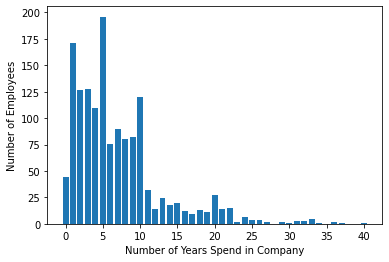

In [45]:
#Time Spent in Company
time_spent=data.groupby('YearsAtCompany').count()
plt.bar(time_spent.index.values, time_spent['JobSatisfaction'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Data Preparation/Clean

In [12]:
data.describe()
#Checking the Null Values
pd.set_option('display.max_rows', 200)
#data.isnull().sum() #no null values
#data.info()

#check for  duplicate records and have the unique records to be included into your dataset:
#data[data.duplicated()] #zero duplicated

In [13]:
#Over18 : ['Y']
#Y    1470
#so tem um unico valor, por isso vou apagar por ser inutil
#data['StandardHours'].unique() tambem so tem 1 valor, que é sempre 80
#data['EmployeeCount'].unique() tambem so tem 1 valor, que é 1

#não trazem valor 

data=data.drop('Over18', axis=1)
data=data.drop('StandardHours', axis=1)
data=data.drop('EmployeeCount', axis=1)

In [14]:
#ver os data types e ver os seus valores unicos

for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_______________________________________________________________')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________________________
Gender : ['Fema

In [15]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.int64:
            continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [16]:
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,0.593674,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,0.632911,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [20]:
print('Turnover rate was: %.2f%%' % (len(data[data.Attrition == 1]) / len(data) * 100))

Turnover rate was: 16.12%


In [23]:
data.corrwith(data.Attrition)

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
W

In [28]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

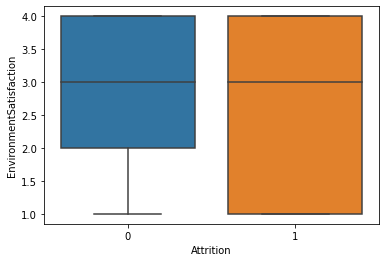

In [24]:
sns.boxplot(x=data.Attrition,y=data.EnvironmentSatisfaction)

In [29]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


<AxesSubplot:xlabel='HourlyRate', ylabel='MonthlyIncome'>

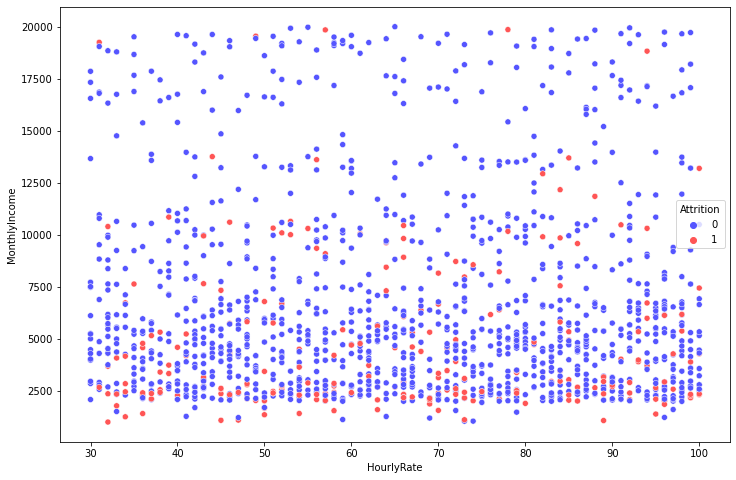

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(ax = ax, x=data.HourlyRate,y=data.MonthlyIncome, hue=data.Attrition, palette="seismic")

In [19]:
a=data[data['Attrition']=='Yes']

In [ ]:
data.corrwith(data.left)

Analise descritiva dos dados-Gráficos


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

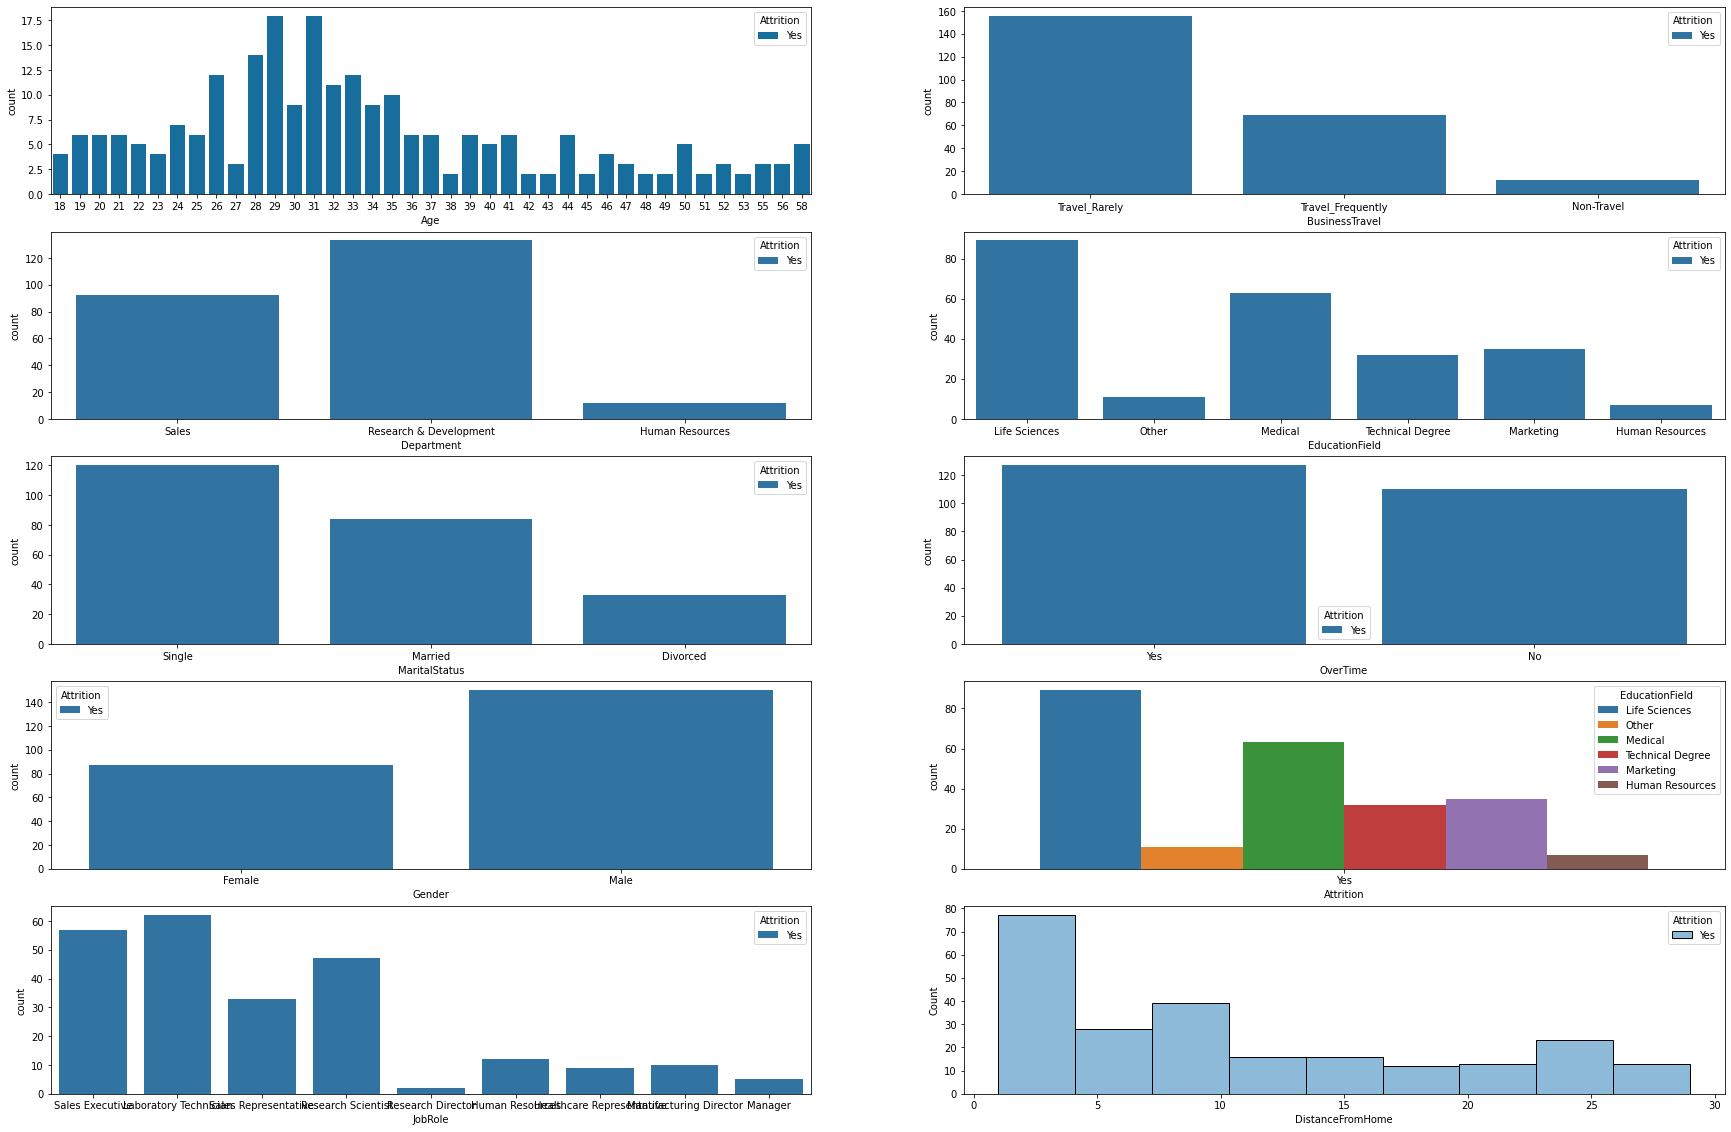

In [54]:
#Attrition em função das variaveis categoricas
fig, axes = plt.subplots(5,2, figsize = (30,20))
sns.countplot(ax = axes[0,0], data = a, x = 'Age', hue='Attrition',palette='colorblind')
sns.countplot(ax = axes[0,1],hue=a.Attrition, x=a.BusinessTravel)
sns.countplot(ax = axes[1,0],hue=a.Attrition, x=a.Department)
sns.countplot(ax = axes[1,1],hue=a.Attrition, x=a.EducationField)
sns.countplot(ax = axes[2,0],hue=a.Attrition, x=a.MaritalStatus)
sns.countplot(ax = axes[2,1],hue=a.Attrition, x=a.OverTime)
sns.countplot(ax = axes[3,0],hue=a.Attrition, x=a.Gender)
sns.countplot(ax = axes[3,1],x=a.Attrition, hue=a.EducationField)
sns.countplot(ax = axes[4,0],x='JobRole', hue='Attrition', data=a)
sns.histplot(ax = axes[4,1],hue=a.Attrition, x=a.DistanceFromHome)


In [17]:
corr = data.corr()

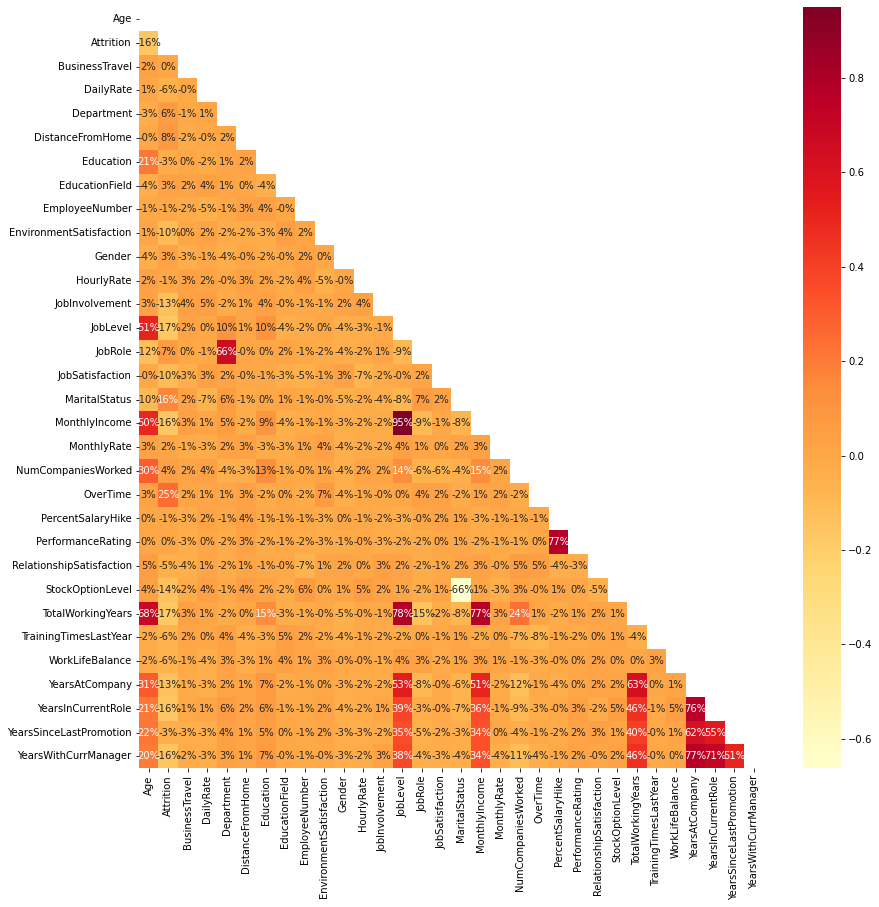

In [41]:
import seaborn as sb
import matplotlib.pyplot as mp
plt.figure(figsize=(14,14))
# creating mask
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlOrRd", annot=True, mask=mask,fmt='0.0%')
 
# displaying heatmap
mp.show()

In [9]:
clean_data=data.to_csv('C:/Users/Catarina Rodrigues/Desktop/EDSB/HR_clean.csv')

# ML-Clustering/Unsupervising

#Kmeans

In [8]:
#Let's find out the groups of employees who left

#satisfaction and performance in the company. 
# So let's bunch them in the group of people using cluster analysis.

In [30]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\CATARI~1\AppData\Local\Temp/ipykernel_10352/360305055.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [31]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [35]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['JobSatisfaction', 'PerformanceRating']][data.Attrition == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

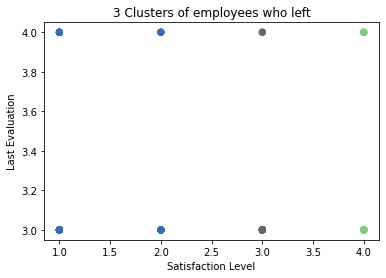

In [37]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['JobSatisfaction'], left_emp['PerformanceRating'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

x numero dos clusters 
y contagem do numero de empregados, cada clusters 

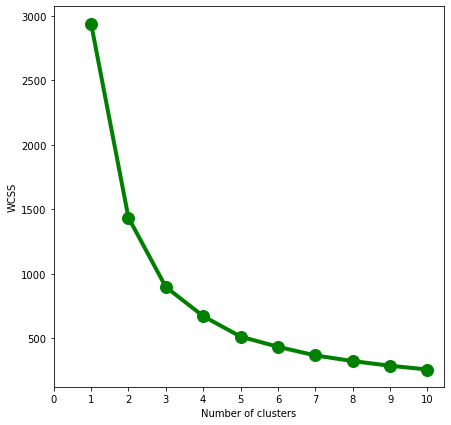

In [21]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
x = data.loc[:,['Age_T','MonthlyIncome_T']].values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)

In [25]:
kmeans.fit(data[['Age_T','MonthlyIncome_T']])

KMeans(n_clusters=4)

In [27]:
data['kmeans_4']=kmeans.labels_

No handles with labels found to put in legend.


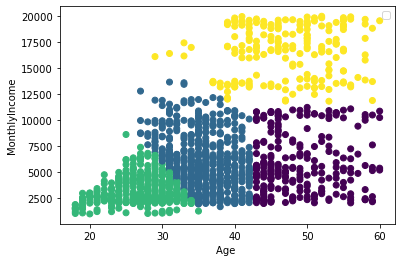

In [32]:
plt.scatter(x=data['Age'],y=data['MonthlyIncome'],c=data['kmeans_4'])
plt.xlabel("Age ")
plt.ylabel("MonthlyIncome")
plt.legend()
plt.show()

# ML-Modelo Preditivo



## Split de data

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

## dataset para treino

In [ ]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Accuracy on the training data

In [ ]:
#Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9782214156079855

In [ ]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[306   4]
 [ 52   6]]
Model Testing Accuracy = "0.8478260869565217!"



In [ ]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.088
Age_Years,0.061
EmployeeNumber,0.058
DailyRate,0.052
MonthlyRate,0.051
TotalWorkingYears,0.047
YearsWithCurrManager,0.042
OverTime,0.040
HourlyRate,0.039


<AxesSubplot:xlabel='feature'>

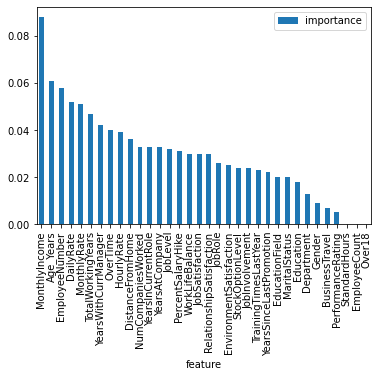

In [ ]:
#Visualize the importance
importances.plot.bar()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,Y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(Y_train,prediction)
    score=accuracy_score(Y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.872051
[Logistic Regression] test data accuracy is : 0.880435
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.779891
[KNN] training data accuracy is : 0.875681
[KNN] test data accuracy is : 0.807065
[SVM] training data accuracy is : 0.882033
[SVM] test data accuracy is : 0.885870
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.858696
[Naive Bayes] training data accuracy is : 0.794011
[Naive Bayes] test data accuracy is : 0.804348


In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,Y_test),
             'KNN classifier':knn.score(X_test,Y_test),
             'Support Vector Machine':svm.score(X_test,Y_test),
             'Random forest':rm.score(X_test,Y_test),
              'Decision tree':dt.score(X_test,Y_test),
              'Naive Bayes':gnb.score(X_test,Y_test)
             }
model_scores

{'Logistic Regression': 0.8804347826086957,
 'KNN classifier': 0.8070652173913043,
 'Support Vector Machine': 0.8858695652173914,
 'Random forest': 0.8586956521739131,
 'Decision tree': 0.779891304347826,
 'Naive Bayes': 0.8043478260869565}

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(Y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.75      0.16      0.26        58

    accuracy                           0.86       368
   macro avg       0.81      0.57      0.59       368
weighted avg       0.84      0.86      0.82       368



In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(Y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       310
           1       0.82      0.31      0.45        58

    accuracy                           0.88       368
   macro avg       0.85      0.65      0.69       368
weighted avg       0.87      0.88      0.86       368



In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.880435,0.807065,0.88587,0.858696,0.779891,0.804348


## Feature Importance

### Logistic Regression

In [ ]:
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Attrition': 0.06296430139468134,
 'BusinessTravel': -0.00042237900156366626,
 'DailyRate': 0.5774324176613999,
 'Department': 0.03816572185482065,
 'DistanceFromHome': 0.06224810652885168,
 'Education': 0.07601875729814939,
 'EducationField': 0.0,
 'EmployeeCount': -0.0001183805426835359,
 'EmployeeNumber': -0.29385467957463773,
 'EnvironmentSatisfaction': 0.25006448380238433,
 'Gender': 0.0018785491177089053,
 'HourlyRate': -0.3479420122522329,
 'JobInvolvement': 0.09949888972881725,
 'JobLevel': -0.03135800867683129,
 'JobRole': -0.28124375779396754,
 'JobSatisfaction': 0.4587925921142502,
 'MaritalStatus': -0.0017442098015780596,
 'MonthlyIncome': 0.0002812758574315112,
 'MonthlyRate': 0.1643002892883921,
 'NumCompaniesWorked': 0.0,
 'Over18': 1.1976119815625814,
 'OverTime': -0.037763649875607694,
 'PercentSalaryHike': 0.1747107331491513,
 'PerformanceRating': -0.18891963239006332,
 'RelationshipSatisfaction': 0.0,
 'StandardHours': -0.19346437446137948,
 'StockOptionLevel': -0.0

<AxesSubplot:title={'center':'Feature Importance'}>

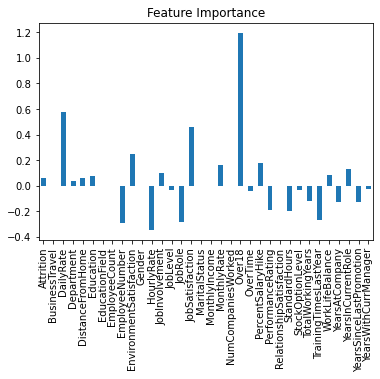

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")